In [1]:
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error 
from sklearn.model_selection import train_test_split 
import seaborn as sns
import numpy as np
import pandas as pd
import math
from math import floor, ceil
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,t,Saham,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,1,6760,NaN,NaN,NaN
1,2,6960,NaN,NaN,NaN
2,3,6945,NaN,NaN,NaN
3,4,7180,NaN,NaN,NaN
4,5,7160,NaN,NaN,NaN


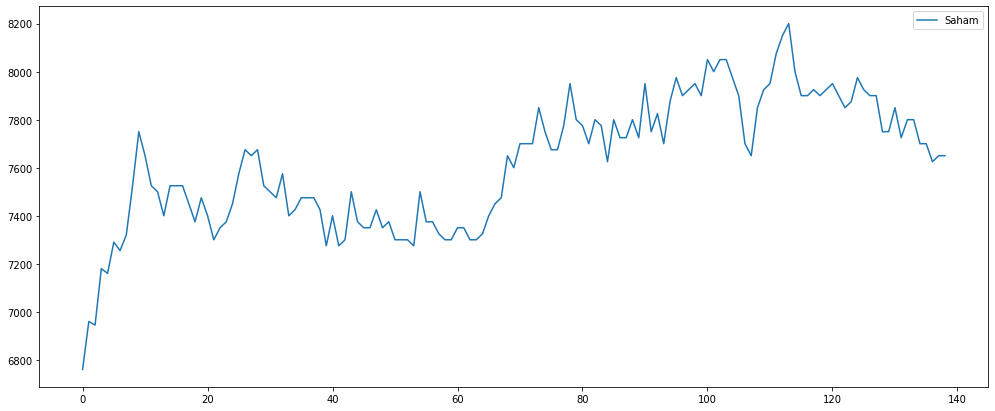

,Data Training,Data Testing
0,6760,7925.0
1,6960,7900.0
2,6945,7900.0
3,7180,7750.0
4,7160,7750.0
5,7290,7850.0
6,7255,7725.0
7,7320,7800.0
8,7525,7800.0
9,7750,7700.0


banyak Data Train :   125
banyak Data Test :   14


In [2]:
#Membaca Data
df = pd.read_csv('/content/Saham Fix.csv')
display(df.head())
print()

data_pakai = df['Saham']

#Plot Data
df[['Saham']].plot(figsize=(17, 7))
plt.show()
print()

X_train, X_test = train_test_split(data_pakai, test_size=0.1, random_state=None, shuffle=False)

X_test = X_test.reset_index(drop=True)
data_training_test = pd.concat([X_train, X_test], axis=1)
data_training_test.columns = ['Data Training', 'Data Testing']
pd.set_option('max_row', None)
display(data_training_test)
print('='*100)
print('banyak Data Train :  ', len(X_train))
print('banyak Data Test :  ', len(X_test))
print('='*100)

In [3]:
#Average Base
def absolute(data):
  abs_value = []
  for i in range(len(data)-1):
    abso = abs(data[i+1] - data[i]) 
    abs_value.append(abso)
  return abs_value

def min_max_mean(data, data_abs, d1, d2):
  min = data.min()
  max = data.max()
  x = max + d2
  y = min - d1
  rata_rata = np.mean(data_abs)
  setengah_rata_rata = rata_rata / 2
  
  return y, x, rata_rata, setengah_rata_rata

def rounding(data):
  global basis
  basis = 0
  if data >= 0.1 and data <= 1.0:
    f = round(data ,1)
    basis = 0.1
    return f
  elif data >= 1.1 and data <= 10:
    f = round(data)
    basis = 1
    return f
  elif data >= 10.1 and data <= 100:
    f = data / 10
    f = round(f)*10
    basis = 10
    return f
  elif data >= 100.1 and data <= 1000:
    f = data / 100
    f = round(f)*100
    basis = 100
    return f

###############################################################################

#Sturges
def Sturges(data, d1, d2):
  max_data = data.max()
  min_data = data.min()
  x = max_data + d2
  y = min_data - d1
  range = x - y
  n = len(data)
  sturges = 1 + (3.3 * math.log10(n))
  jumlah_intrvl = round(sturges)
  panjang = round(range/jumlah_intrvl)
  return panjang, jumlah_intrvl, y, x

##############################################################################

#Distribution based
def Distribution(data, d1, d2):
  global data_selisih, x, y, list_coba1, df_selisih
  data_selisih = []
  max_data = data.max()
  min_data = data.min()
  x = max_data + d2
  y = min_data - d1
  for i in range(len(data)-1):
    selisih = abs(data[i+1] - data[i])
    data_selisih.append(selisih)
  nilai_rata2_selisih = sum(data_selisih)/len(data_selisih)
  setengah_nilai_rata2_selisih = nilai_rata2_selisih/2

  rounding(nilai_rata2_selisih)

  actual_freq = 1/(len(data)-1)
  data_selisih.sort()
  list_coba = [actual_freq]
  for i in range(len(data)-2):
    x1 = actual_freq + list_coba[i]
    list_coba.append(x1)
  df_selisih = pd.DataFrame(data_selisih, columns=['Data Selisih'])
  list_coba1 = pd.DataFrame(list_coba, columns=['Data Selisih'])

  x2 = (len(data)-1)/2
  
  X_index = np.arange (0,x+basis,basis)
  list_sum = {}
  for i in X_index[1:10]:
    x3 = len(df_selisih[df_selisih['Data Selisih'] < i])
    if x3 < 62:
      list_sum[i] = x3
  max_list = max(list_sum.values())
  for j in list_sum:
    if list_sum[j] == max_list:
      panjang_interval = j
  return panjang_interval, min_data

def interval_distribution(data):
  interval = []
  i = 0
  j = 0
  while i < x:
    u = [round(y + (j * data)), round(y + ((j+1) * data))]
    if u[1] < x:
      interval.append(u)
    i = y + ((j+1) * data)
    j += 1
  return interval

##############################################################################

def interval_median(min_data, interval_length, total_interval):
  nilai_tengah = [(math.floor(min_data + i*interval_length) + math.floor(min_data + (i+1)*interval_length))/2 for i in range(total_interval)] 
  
  return nilai_tengah

def Fuzzifikasi(data):
    global NT
    list1 = []
    NT = []

    for i in range(len(data)):
      for j in range(len(interval)):
        if interval[j][0] <= data[i] < interval[j][1]:
          list1.append('A'+str(j+1))
          NT.append(nilai_tengah_interval[j])
    data_fuzzi = pd.DataFrame(list1, columns=['Fuzzifikasi'])
    data_nt = pd.DataFrame(NT, columns=['Nilai Tengah'])
    data_fuzzi = pd.concat([data_pakai, data_fuzzi, data_nt], axis=1)
    return data_fuzzi, data_nt

def nextstage(data):
  global next, curent
  next = [np.NaN,np.NaN]
  list_next = [np.NaN,np.NaN]
  curent = [np.NaN,np.NaN]
  for i in range(len(data)-2):
    x = data.values[i:i+2]
    y = data.values[i+2]
    list_next.append(f'{x} -> {[y]}')
    next.append(f'{x[0]},{x[1]}')
    curent.append(y)
  cs = pd.DataFrame(list_next, columns=['CurrentStage'])
  next1 = pd.DataFrame(next, columns=['Next'])
  curent1 = pd.DataFrame(curent, columns=['Nilai'])
  data = pd.concat([cs,next1,curent1],axis=1)
  return data

def sum_row(data):
  total = []
  for i in range(len(df_flrg)):
    total.append(int(data.iloc[i,:].sum()))
  data['jumlah'] = total
  df = df_flrg.join(data)
  #zz = df_flrg['NSFLRG'].str.join(sep=',').str.get_dummies(sep=',')
  return df

def peluang(data):
  kolom = []
  for i in data.columns[:-1]:
    for k in range(len(data)):
      if data[i][k] >= 1:
        bagi = round(data[i][k] / data['jumlah'][k],3)
        kolom.append(bagi)
      else:
        kolom.append(data[i][k])
    cc = kolom.copy()
    data[i] = cc
    kolom.clear()
    df = df_flrg.join(data)
  return df

def Peramalan(data):
  global kolom_crs1
  kolom = []
  kolom_2 = []
  for i in range(len(interval)):
    kolom.append('A'+str(i+1))
    kolom_2.append(i+1)
  kolom = pd.DataFrame(kolom, columns=['Fuzzifikasi'])
  nilai_t = pd.DataFrame(nilai_tengah_interval, columns=['Nilai Tengah'])
  kolom_2 = pd.DataFrame(kolom_2, columns=['Index'])
  df3 = pd.concat([kolom_2,kolom,nilai_t], axis=1)

  kolom_crs1 = []
  peramalan = {}
  list_peramalan = []
  peramalan2 = []
  for i in range(len(data_pakai)-2):
    kolom_crs1.append(data.Next[i].split(',')[1])
    for j in range(len(df_model)):
      if data.Next[i] == df_model.Next[j]:
        data_olah = df_model.iloc[j,:-1]
        for k in df_model.columns[2:-1]:
          for l in range(len(df3)):
            if k == df3.Fuzzifikasi[l]:
              hasil = df3['Nilai Tengah'][l] * data_olah[k]
              peramalan[k] = hasil
          for m in data_olah['NSFLRG']:
            if kolom_crs1[i] == m:
              hasil = data_pakai[i+1] * data_olah[m]
              peramalan[kolom_crs1[i]] = hasil

    peramalan3 = peramalan.copy()
    peramalan2.append(peramalan3)
    peramalan.clear()

  for n in peramalan2:
    list_peramalan.append(sum(list(n.values())))
  df_peramalan = pd.DataFrame(list_peramalan, columns=['Peramalan Awal'])
  df = data.join(df_peramalan)
  return df

def Peramalan_Akhir(data):
  Cr_1 = []
  Ne_1 = []
  pergeseran = []
  kolom_p = []
  Pa = []
  for i in range(len(data)):
    #Pergeseran
    Cr_1.append(int(kolom_crs1[i][1:]))
    Ne_1.append(int(data.Nilai[i][1:]))
    x = Ne_1[i] - Cr_1[i]
    pergeseran.append(x)
    #Penyesuaian
    y = (pergeseran[i] * panjang_interval) / 2
    kolom_p.append(y)
    #Peramalan Akhir
    z = data['Peramalan Awal'][i] + kolom_p[i]
    Pa.append(z)

  df_pergeseran = pd.DataFrame(pergeseran, columns=['Pergeseran'])
  df_penyesuaian = pd.DataFrame(kolom_p, columns=['Penyesuaian'])
  df_pa = pd.DataFrame(Pa, columns=['Peramalan Akhir'])
  df = pd.concat([data, df_pergeseran, df_penyesuaian, df_pa], axis=1)
  return df

def mape(data1,data2):
  global mape_ygy
  mape_ygy = []
  for i in range(len(data1)):
    mape_ygy.append(abs((data1[i]-data2[i])/data1[i]))
  nilai = sum(mape_ygy)/len(mape_ygy)
  return nilai*100

def Rmse(x,y):
    x, y = np.array(x), np.array(y)
    MSE = np.square(np.subtract(x,y)).mean() 
    return math.sqrt(MSE)

Pilih Metode : 
[1] Average Based
[2] Sturges Based
[3] Distribution Based
pilihan (1-3) :1
Masukan d1 < d2
d1 : 70
d2 : 90
min data : 6690.0
max data : 8290.0
Panjang Interval :  40
Banyak Interval :  40
Interval [1] : [6690.0 - 6730.0]
Interval [2] : [6730.0 - 6770.0]
Interval [3] : [6770.0 - 6810.0]
Interval [4] : [6810.0 - 6850.0]
Interval [5] : [6850.0 - 6890.0]
Interval [6] : [6890.0 - 6930.0]
Interval [7] : [6930.0 - 6970.0]
Interval [8] : [6970.0 - 7010.0]
Interval [9] : [7010.0 - 7050.0]
Interval [10] : [7050.0 - 7090.0]
Interval [11] : [7090.0 - 7130.0]
Interval [12] : [7130.0 - 7170.0]
Interval [13] : [7170.0 - 7210.0]
Interval [14] : [7210.0 - 7250.0]
Interval [15] : [7250.0 - 7290.0]
Interval [16] : [7290.0 - 7330.0]
Interval [17] : [7330.0 - 7370.0]
Interval [18] : [7370.0 - 7410.0]
Interval [19] : [7410.0 - 7450.0]
Interval [20] : [7450.0 - 7490.0]
Interval [21] : [7490.0 - 7530.0]
Interval [22] : [7530.0 - 7570.0]
Interval [23] : [7570.0 - 7610.0]
Interval [24] : [7610.

,Saham,Fuzzifikasi
0,6760.0,A2
1,6960.0,A7
2,6945.0,A7
3,7180.0,A13
4,7160.0,A12
5,7290.0,A16
6,7255.0,A15
7,7320.0,A16
8,7525.0,A21
9,7750.0,A27


,Saham,Fuzzifikasi,CurrentStage
0,6945.0,A7,['A2' 'A7'] -> ['A7']
1,7180.0,A13,['A7' 'A7'] -> ['A13']
2,7160.0,A12,['A7' 'A13'] -> ['A12']
3,7290.0,A16,['A13' 'A12'] -> ['A16']
4,7255.0,A15,['A12' 'A16'] -> ['A15']
5,7320.0,A16,['A16' 'A15'] -> ['A16']
6,7525.0,A21,['A15' 'A16'] -> ['A21']
7,7750.0,A27,['A16' 'A21'] -> ['A27']
8,7650.0,A25,['A21' 'A27'] -> ['A25']
9,7525.0,A21,['A27' 'A25'] -> ['A21']


FLRG :


,Next,NSFLRG
0,"A2,A7",[A7]
1,"A7,A7",[A13]
2,"A7,A13",[A12]
3,"A13,A12",[A16]
4,"A12,A16",[A15]
5,"A16,A15","[A16, A21]"
6,"A15,A16","[A21, A21]"
7,"A16,A21","[A27, A18]"
8,"A21,A27",[A25]
9,"A27,A25","[A21, A25]"


,Next,NSFLRG,A7,A13,A12,A16,A15,A21,A27,A18,...,A33,A32,A24,A29,A31,A35,A34,A37,A38,jumlah
0,"A2,A7",[A7],1.0,0.0,0.0,0.000,0.000,0.000,0.0,0.000,...,0.0,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,1
1,"A7,A7",[A13],0.0,1.0,0.0,0.000,0.000,0.000,0.0,0.000,...,0.0,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,1
2,"A7,A13",[A12],0.0,0.0,1.0,0.000,0.000,0.000,0.0,0.000,...,0.0,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,1
3,"A13,A12",[A16],0.0,0.0,0.0,1.000,0.000,0.000,0.0,0.000,...,0.0,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,1
4,"A12,A16",[A15],0.0,0.0,0.0,0.000,1.000,0.000,0.0,0.000,...,0.0,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,1
5,"A16,A15","[A16, A21]",0.0,0.0,0.0,0.500,0.000,0.500,0.0,0.000,...,0.0,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,2
6,"A15,A16","[A21, A21]",0.0,0.0,0.0,0.000,0.000,1.000,0.0,0.000,...,0.0,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,2
7,"A16,A21","[A27, A18]",0.0,0.0,0.0,0.000,0.000,0.000,0.5,0.500,...,0.0,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,2
8,"A21,A27",[A25],0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.000,...,0.0,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,1
9,"A27,A25","[A21, A25]",0.0,0.0,0.0,0.000,0.000,0.500,0.0,0.000,...,0.0,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,2


,Saham,Fuzzifikasi,CurrentStage,Peramalan Awal,Pergeseran,Penyesuaian,Peramalan Akhir
0,6945.0,A7,['A2' 'A7'] -> ['A7'],6960.000,0,0.0,6960.000
1,7180.0,A13,['A7' 'A7'] -> ['A13'],7190.000,6,120.0,7310.000
2,7160.0,A12,['A7' 'A13'] -> ['A12'],7150.000,-1,-20.0,7130.000
3,7290.0,A16,['A13' 'A12'] -> ['A16'],7310.000,4,80.0,7390.000
4,7255.0,A15,['A12' 'A16'] -> ['A15'],7270.000,-1,-20.0,7250.000
5,7320.0,A16,['A16' 'A15'] -> ['A16'],7410.000,1,20.0,7430.000
6,7525.0,A21,['A15' 'A16'] -> ['A21'],7510.000,5,100.0,7610.000
7,7750.0,A27,['A16' 'A21'] -> ['A27'],7570.000,6,120.0,7690.000
8,7650.0,A25,['A21' 'A27'] -> ['A25'],7670.000,-2,-40.0,7630.000
9,7525.0,A21,['A27' 'A25'] -> ['A21'],7580.000,-4,-80.0,7500.000


Hasil Peramalan 1 hari kedepan :



,Saham,Fuzzifikasi,CurrentStage,Peramalan Awal,Pergeseran,Penyesuaian,Peramalan Akhir
122,7975.0,A33,['A30' 'A30'] -> ['A33'],7990.0,3,60.0,8050.0


Mape Data Training :  0.5527003352075677
RMSE Data Training :  52.47597953783509

Mape Data Testing :  3.34965114998256
RMSE Data Testing :  275.87199412564
Plot Data Train : 


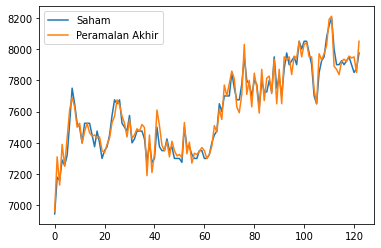

Plot Data Test : 


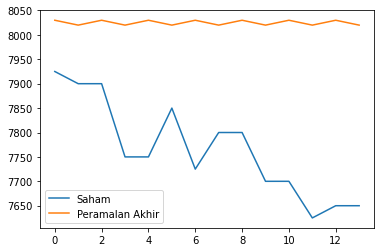

Plot Data Keseluruhan : 


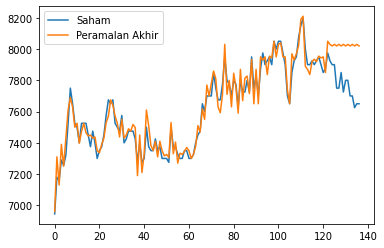

In [4]:
#Main Program
print('Pilih Metode : ')
print('[1] Average Based')
print('[2] Sturges Based')
print('[3] Distribution Based')
pilihan = int(input('pilihan (1-3) :'))
print('Masukan d1 < d2')
d1 = int(input('d1 : '))
d2 = int(input('d2 : '))

for i in range(len(X_test)+1):
  if i == 0:
    data_pakai = X_train.copy()
  else:
    data_pakai = data_pakai['Saham']

  if pilihan == 1:
    Data_absolute = absolute(data_pakai)
    min_data, max_data, rata_rata_data, setengah_rata_data = min_max_mean(data_pakai, Data_absolute, d1, d2)
    panjang_interval = rounding(setengah_rata_data)
    jumlah_interval = math.ceil((max_data - min_data)/panjang_interval)
  if pilihan == 2:
    panjang_interval, jumlah_interval, min_data, max_data = Sturges(data_pakai, d1, d2)
  if pilihan == 3:
    panjang_interval, min_data = Distribution(data_pakai, d1, d2)

  #Penentuan Interval 
  if pilihan == 3:
    interval = interval_distribution(panjang_interval)
  else:
    interval = []
    for i in range(jumlah_interval):
      inter = [round(min_data + i * panjang_interval,2), round(min_data + (i+1) * panjang_interval,2)]
      interval.append(inter)

  #Nilai Tengah
  nilai_tengah_interval = interval_median(min_data, panjang_interval, len(interval))

  #Fuzifikasi
  data_fuzzi, data_nt = Fuzzifikasi(data_pakai)

  NS = nextstage(data_fuzzi['Fuzzifikasi'])
  df_flr = pd.concat([data_fuzzi,NS], axis=1)
  
  #FLRG
  df_flr = df_flr.dropna().reset_index(drop=True)
  next2 = df_flr.Next.drop_duplicates().reset_index(drop=True)
  flrg = []
  for i in next2:
    x = df_flr.Nilai[df_flr.Next == i].values
    flrg.append([x])
  list6_series = pd.DataFrame(flrg, columns=['NSFLRG'])
  df_flrg = pd.concat([next2, list6_series], axis=1)

  zz_coba = df_flrg['NSFLRG'].apply(pd.value_counts)
  zz_coba = zz_coba.replace(np.NaN, 0.0)
  sum_row(zz_coba)
  df_model = peluang(zz_coba)
  df_flr = Peramalan(df_flr)
  df_model_data_train = Peramalan_Akhir(df_flr)

  data_baru = data_pakai.copy().to_list()
  data_baru.append(df_model_data_train['Peramalan Akhir'].iloc[-1])
  data_pakai = pd.DataFrame(data_baru, columns=['Saham'])

#Menghitung Nilai Mape
mape_data_train = mape(X_train[2:].reset_index(drop=True),df_model_data_train['Peramalan Akhir'][:-len(X_test)])
mape_data_test = mape(X_test,df_model_data_train['Peramalan Akhir'][-len(X_test):].reset_index(drop=True))
#Menghitung Nilai RMSE
rmse_data_train = Rmse(X_train[2:].reset_index(drop=True),df_model_data_train['Peramalan Akhir'][:-len(X_test)])
rmse_data_test = Rmse(X_test,df_model_data_train['Peramalan Akhir'][-len(X_test):].reset_index(drop=True))

plot_df_train = pd.concat([X_train[2:].reset_index(drop=True),
                           df_model_data_train['Peramalan Akhir'][:-len(X_test)]],
                          axis = 1)
plot_df_test = pd.concat([X_test,
                          df_model_data_train['Peramalan Akhir'][-len(X_test):].reset_index(drop=True)],
                         axis = 1)
plot_data_seluruh = pd.concat([df['Saham'][2:].reset_index(drop=True), 
                               df_model_data_train['Peramalan Akhir']],
                              axis = 1)
if pilihan == 3:
  print('='*100)
  plt.figure(figsize = (10,6))
  plt.scatter(df_selisih['Data Selisih'], list_coba1)
  plt.title('Plot Distibusi Komulatif')
  plt.ylabel('Actual Freq')
  plt.xscale('linear')
  plt.show()
  print('='*100)
  print('Panjang Interval : ', panjang_interval)
  print('='*100)
else:
  print('='*100)
  print(f'min data : {min_data}')
  print(f'max data : {max_data}')
  print('Panjang Interval : ', panjang_interval)
  print('Banyak Interval : ', len(interval))
  print('='*100)
for i in range(len(interval)):
  print(f'Interval {[i+1]} : [{interval[i][0]} - {interval[i][-1]}]')
print('='*100)
for i in range(len(interval)):
  print('Nilai Tengah : '+str([i+1]), nilai_tengah_interval[i])
print('='*100)
display(data_fuzzi[['Saham', 'Fuzzifikasi']])
print('='*100)
display(df_flr[['Saham', 'Fuzzifikasi', 'CurrentStage']])
print('='*100)
print('FLRG :')
pd.set_option('max_colwidth',None)
display(df_flrg)
print('='*100)
display(df_model)
print('='*100)
display(df_model_data_train[['Saham', 
                             'Fuzzifikasi', 
                             'CurrentStage', 
                             'Peramalan Awal', 
                             'Pergeseran', 
                             'Penyesuaian', 
                             'Peramalan Akhir']])
print('='*100)
print('Hasil Peramalan 1 hari kedepan :')
print()
display(df_model_data_train[['Saham', 
                             'Fuzzifikasi', 
                             'CurrentStage', 
                             'Peramalan Awal', 
                             'Pergeseran', 
                             'Penyesuaian', 
                             'Peramalan Akhir']].iloc[len(X_train)-3:-len(X_test)])
print('='*100)
print('Mape Data Training : ', mape_data_train)
print('RMSE Data Training : ', rmse_data_train)
print()
print('Mape Data Testing : ', mape_data_test)
print('RMSE Data Testing : ', rmse_data_test)
print('='*100)
print('Plot Data Train : ')
plot_df_train.plot()
plt.show()
print('='*100)
print('Plot Data Test : ')
plot_df_test.plot()
plt.show()
print('='*100)
print('Plot Data Keseluruhan : ')
plot_data_seluruh.plot()
plt.show()

(1000.0, 8273.25)

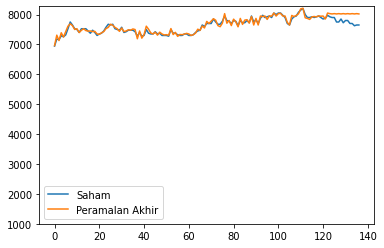

In [5]:
plot_data_seluruh.plot()
plt.ylim(1000)

In [6]:
display(df_model_data_train[['Saham', 
                             'Fuzzifikasi', 
                             'CurrentStage', 
                             'Peramalan Awal', 
                             'Pergeseran', 
                             'Penyesuaian', 
                             'Peramalan Akhir']].iloc[len(X_train)-3:-len(X_test)+1])

,Saham,Fuzzifikasi,CurrentStage,Peramalan Awal,Pergeseran,Penyesuaian,Peramalan Akhir
122,7975.0,A33,['A30' 'A30'] -> ['A33'],7990.0,3,60.0,8050.0
123,8050.0,A35,['A30' 'A33'] -> ['A35'],7990.0,2,40.0,8030.0


In [7]:
#Mencari berapa hari peramalan
print('='*100)
hari = int(input('Berapa hari Peramalan (>= 1 hari) : '))
print('Pilih Metode : ')
print('[1] Average Based')
print('[2] Sturges Based')
print('[3] Distribution Based')
pilihan = int(input('pilihan (1-3) :'))
metode = ['Average Based',
          'Sturges Based',
          'Distribution Based']
print(metode[pilihan-1])

index_data = []
for i in range(hari):
  index_data.append(i+1)
  if i == 0:
    data_pakai = X_train.copy()
  else:
    data_pakai = data_pakai['Saham']

  if pilihan == 1:
    Data_absolute = absolute(data_pakai)
    min_data, max_data, rata_rata_data, setengah_rata_data = min_max_mean(data_pakai, Data_absolute, d1, d2)
    panjang_interval = rounding(setengah_rata_data)
    jumlah_interval = math.ceil((max_data - min_data)/panjang_interval)
  if pilihan == 2:
    panjang_interval, jumlah_interval, min_data, max_data = Sturges(data_pakai, d1, d2)
  if pilihan == 3:
    panjang_interval, min_data = Distribution(data_pakai, d1, d2)

  #Penentuan Interval 
  if pilihan == 3:
    interval = interval_distribution(panjang_interval)
  else:
    interval = []
    for i in range(jumlah_interval):
      inter = [round(min_data + i * panjang_interval,2), round(min_data + (i+1) * panjang_interval,2)]
      interval.append(inter)

  #Nilai Tengah
  nilai_tengah_interval = interval_median(min_data, panjang_interval, len(interval))

  #Fuzifikasi
  data_fuzzi, data_nt = Fuzzifikasi(data_pakai)

  NS = nextstage(data_fuzzi['Fuzzifikasi'])
  df_flr = pd.concat([data_fuzzi,NS], axis=1)
  
  #FLRG
  df_flr = df_flr.dropna().reset_index(drop=True)
  next2 = df_flr.Next.drop_duplicates().reset_index(drop=True)
  flrg = []
  for i in next2:
    x = df_flr.Nilai[df_flr.Next == i].values
    flrg.append([x])
  list6_series = pd.DataFrame(flrg, columns=['NSFLRG'])
  df_flrg = pd.concat([next2, list6_series], axis=1)

  zz_coba = df_flrg['NSFLRG'].apply(pd.value_counts)
  zz_coba = zz_coba.replace(np.NaN, 0.0)
  sum_row(zz_coba)
  df_model = peluang(zz_coba)
  df_flr = Peramalan(df_flr)
  df_model_data_train = Peramalan_Akhir(df_flr)

  data_baru = data_pakai.copy().to_list()
  data_baru.append(df_model_data_train['Peramalan Akhir'].iloc[-1])
  data_pakai = pd.DataFrame(data_baru, columns=['Saham'])

print('='*100)
print(f'Hasil Peramalan {metode[pilihan-1]} {hari} hari kedepan :')
print()
df_index = pd.DataFrame(index_data, columns=['Hari'])
df_data_jadi = pd.concat([df_index, df_model_data_train[['Peramalan Akhir']].iloc[-hari:].reset_index(drop=True)], axis=1)
display(df_data_jadi)

Berapa hari Peramalan (>= 1 hari) : 2
Pilih Metode : 
[1] Average Based
[2] Sturges Based
[3] Distribution Based
pilihan (1-3) :1
Average Based
Hasil Peramalan Average Based 2 hari kedepan :



,Hari,Peramalan Akhir
0,1,8050.0
1,2,8030.0
